 Important Feature indexes in the ensemble 
' 0 ' - 0.00956205775482884
' 6 ' - 0.028560080195192083
' 7 ' - 0.032271944922547334
' 12 ' - 0.020536692223439214
' 17 ' - 0.01961308437212052
' 20 ' - 0.019458453193392955
' 24 ' - 0.01323977227591685
' 31 ' - 0.02680273764611114
' 33 ' - 0.00956205775482884
' 37 ' - 0.012550200803212853
' 39 ' - 0.043254937833251135
' 40 ' - 0.08839799480464322
' 41 ' - 0.17227026784039356
' 42 ' - 0.13616303432761198
' 43 ' - 0.146597642417923
' 44 ' - 0.1432137829664364
' 45 ' - 0.07794525866815022


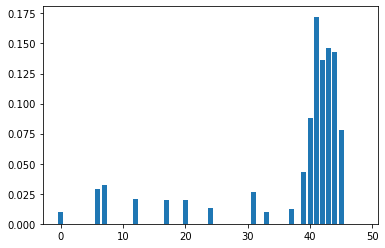

In [1]:
import pickle
import pandas as pd 
import matplotlib.pyplot as pyplot
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

with open('models/soft_ensemble.pkl', 'rb') as f:
    clf = pickle.load(f)

imp_featuresInd = []
for model in clf.estimators_:
    if model.__class__.__name__ == 'DecisionTreeClassifier':
        importance = model.feature_importances_
        print("\033[1m Important Feature indexes in the ensemble \033[0m")
        for i in range(len(importance)):
            if importance[i] != 0: 
                print ("'",i,"'", end = " - ")
                print (importance[i])
                imp_featuresInd.append(i)
        pyplot.bar([x for x in range(len(importance))], importance)
        pyplot.show()

In [2]:
data = pd.read_csv("./data/cleveland_final.csv")
imp_features = data.iloc[:, imp_featuresInd]


#References for the keys for other domains
importantFeatures = data.columns[imp_featuresInd]


print(imp_features.shape)
imp_features.describe()

(282, 17)


,age,cigs,years,ekgmo,nitr,thaldur,thalrest,oldpeak,rldv5e,cday,num,lmt,ladprox,laddist,cxmain,om1,rcaprox
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,54.411348,16.460993,14.829787,6.404255,0.180851,8.418440,75.117021,1.026950,123.585106,15.347518,0.907801,1.042553,1.141844,1.205674,1.156028,1.163121,1.173759
std,9.053083,19.580300,15.564563,3.790752,0.888392,2.590569,13.795809,1.138825,46.783839,8.830541,1.224894,0.202206,0.349510,0.404912,0.363527,0.370132,0.379576
min,29.000000,-9.000000,-9.000000,1.000000,-9.000000,1.800000,40.000000,0.000000,24.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,48.000000,0.000000,0.000000,3.000000,0.000000,6.500000,65.000000,0.000000,92.000000,8.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,55.000000,10.000000,15.000000,7.000000,0.000000,8.500000,74.000000,0.800000,118.000000,15.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,61.000000,30.000000,30.000000,10.000000,0.000000,10.075000,84.000000,1.600000,152.750000,22.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,77.000000,99.000000,54.000000,12.000000,1.000000,15.000000,119.000000,6.200000,270.000000,31.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [3]:
pcaCandidates = data.drop(imp_features.columns, axis=1)
pcaCandidates.describe()

,sex,cp,trestbps,htn,chol,fbs,dm,famhist,restecg,ekgday,...,xhypo,slope,ca,thal,cmo,cyr,rcadist,lvx3,lvx4,lvf
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,...,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.00000
mean,0.677305,3.163121,131.563830,0.617021,249.092199,0.148936,-8.184397,0.620567,1.014184,15.223404,...,0.021277,1.585106,0.595745,4.581560,6.400709,82.304965,1.127660,1.134752,1.411348,1.14539
std,0.468338,0.955405,17.757496,0.486977,51.217546,0.356658,2.741802,0.486108,0.998118,8.686089,...,0.144561,0.609700,1.236910,2.248467,3.744376,0.957780,0.334304,0.766002,1.439508,0.44257
min,0.000000,1.000000,94.000000,0.000000,126.000000,0.000000,-9.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,-9.000000,-9.000000,1.000000,81.000000,1.000000,1.000000,1.000000,1.00000
25%,0.000000,3.000000,120.000000,0.000000,213.000000,0.000000,-9.000000,0.000000,0.000000,8.000000,...,0.000000,1.000000,0.000000,3.000000,3.000000,82.000000,1.000000,1.000000,1.000000,1.00000
50%,1.000000,3.000000,130.000000,1.000000,244.000000,0.000000,-9.000000,1.000000,2.000000,15.000000,...,0.000000,2.000000,0.000000,3.000000,7.000000,82.000000,1.000000,1.000000,1.000000,1.00000
75%,1.000000,4.000000,140.000000,1.000000,277.000000,0.000000,-9.000000,1.000000,2.000000,22.000000,...,0.000000,2.000000,1.000000,7.000000,10.000000,83.000000,1.000000,1.000000,1.000000,1.00000
max,1.000000,4.000000,200.000000,1.000000,564.000000,1.000000,1.000000,1.000000,2.000000,31.000000,...,1.000000,3.000000,3.000000,7.000000,12.000000,84.000000,2.000000,8.000000,8.000000,4.00000


In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

(282, 3)


/mnt/c/Users/meivenkatkumar/fyp/fyp1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


,pca1,pca2,pca3
count,282.000000,282.000000,282.000000
mean,-282.769745,-260.058066,94.639238
std,1.064947,1.623220,1.163242
min,-285.142415,-264.031279,92.290595
25%,-283.510350,-261.056008,93.789752
50%,-282.828437,-260.130861,94.600458
75%,-282.133080,-259.111008,95.401672
max,-276.762445,-255.378829,97.846397


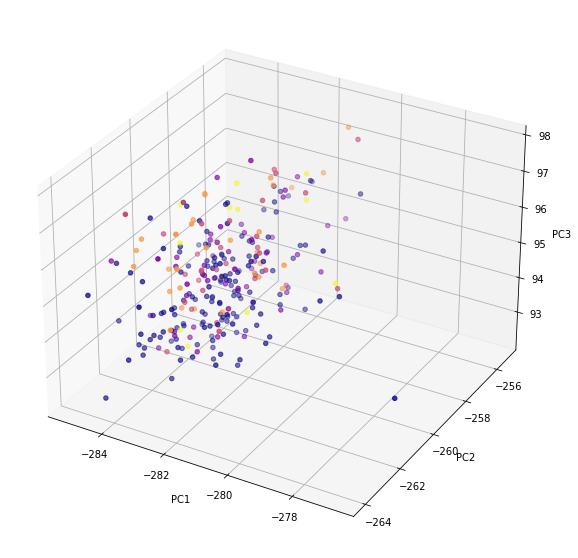

In [5]:
scaling=StandardScaler()
 
scaling.fit(pcaCandidates)
Scaled_data=scaling.transform(pcaCandidates)
 

principal=PCA(n_components=3)
principal.fit(pcaCandidates)
# principal.fit(Scaled_data)
postPCA=principal.transform(Scaled_data)

print(postPCA.shape)

fig = pyplot.figure(figsize=(10,10))
 
# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')
 
# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(postPCA[:,0], postPCA[:,1], postPCA[:,2], c=imp_features['num'],cmap='plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)

postPCA = pd.DataFrame(postPCA, columns=['pca1', 'pca2', 'pca3'])
postPCA.describe()

In [6]:
data =  pd.concat([imp_features, postPCA], axis=1)
print(data.shape)
data.describe()

(282, 20)


,age,cigs,years,ekgmo,nitr,thaldur,thalrest,oldpeak,rldv5e,cday,num,lmt,ladprox,laddist,cxmain,om1,rcaprox,pca1,pca2,pca3
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,54.411348,16.460993,14.829787,6.404255,0.180851,8.418440,75.117021,1.026950,123.585106,15.347518,0.907801,1.042553,1.141844,1.205674,1.156028,1.163121,1.173759,-282.769745,-260.058066,94.639238
std,9.053083,19.580300,15.564563,3.790752,0.888392,2.590569,13.795809,1.138825,46.783839,8.830541,1.224894,0.202206,0.349510,0.404912,0.363527,0.370132,0.379576,1.064947,1.623220,1.163242
min,29.000000,-9.000000,-9.000000,1.000000,-9.000000,1.800000,40.000000,0.000000,24.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-285.142415,-264.031279,92.290595
25%,48.000000,0.000000,0.000000,3.000000,0.000000,6.500000,65.000000,0.000000,92.000000,8.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-283.510350,-261.056008,93.789752
50%,55.000000,10.000000,15.000000,7.000000,0.000000,8.500000,74.000000,0.800000,118.000000,15.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-282.828437,-260.130861,94.600458
75%,61.000000,30.000000,30.000000,10.000000,0.000000,10.075000,84.000000,1.600000,152.750000,22.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-282.133080,-259.111008,95.401672
max,77.000000,99.000000,54.000000,12.000000,1.000000,15.000000,119.000000,6.200000,270.000000,31.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,-276.762445,-255.378829,97.846397


In [7]:
y = data['num']
x = data.drop(["num"],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (197, 19)
x_test (85, 19)
y_train (197,)
y_test (85,)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       0.76      1.00      0.87        13
           2       0.78      1.00      0.88         7
           3       1.00      0.46      0.63        13
           4       0.67      0.80      0.73         5

    accuracy                           0.91        85
   macro avg       0.84      0.85      0.82        85
weighted avg       0.93      0.91      0.90        85



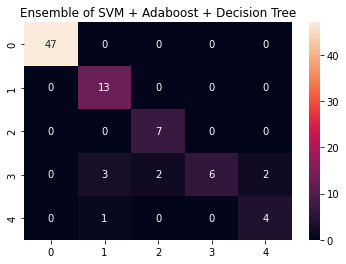

In [14]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import seaborn as sns
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier 

seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
# create the sub models
estimatorsh = []
estimatorss = []
model1 = DecisionTreeClassifier()
model2 = SVC(kernel= 'linear', C=1)
model3 = AdaBoostClassifier(n_estimators=300)

estimatorsh.append(('svm', model2))
estimatorsh.append(('dt', model1))
estimatorsh.append(('abc', model3))


model1 = DecisionTreeClassifier()
model2 = SVC(kernel= 'linear', C=1, probability=True)
model3 = AdaBoostClassifier(n_estimators=300)

estimatorss.append(('svm', model2))
estimatorss.append(('dt', model1))
estimatorss.append(('abc', model3))


# create the ensemble model
cl_soft = VotingClassifier(estimatorss, voting ='soft')


cl_soft.fit(x_train, y_train)
y_pred = cl_soft.predict(x_test)
accuracy_score(y_test, y_pred)


cm = confusion_matrix(y_test, y_pred)
pyplot.title("Ensemble of SVM + Adaboost + Decision Tree")
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_pred))

## Cleveland domain Model

In [15]:
import pickle
# now you can save it to a file
with open('models/cleveland_ensemble.pkl', 'wb') as f:
     pickle.dump(cl_soft, f)

(123, 3)
(123, 12)
x_train (86, 11)
x_test (37, 11)
y_train (86,)
y_test (37,)


/mnt/c/Users/meivenkatkumar/fyp/fyp1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


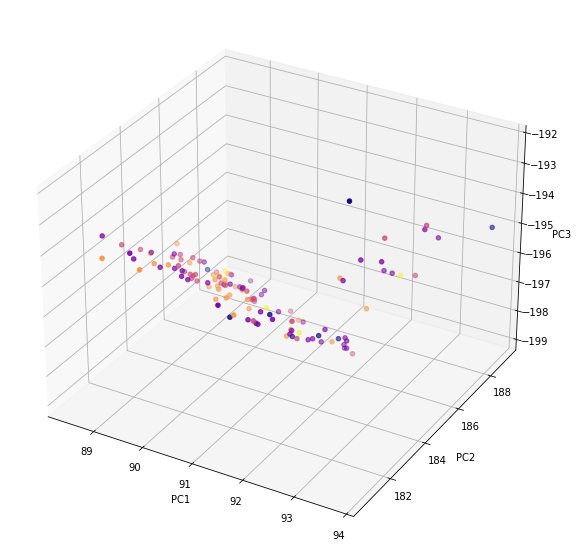

In [16]:
data = pd.read_csv("./data/switzerland_01.csv")

y_switz = data['num']

X_list  = []
PCA_list = []
for key in importantFeatures:
    if key in data: 
         X_list.append(key)
        
x_important = pd.DataFrame(data.loc[:, X_list], columns=X_list)

for key in data.columns:
    if key not in X_list:
        PCA_list.append(key)

        
pcaCandidates = pd.DataFrame(data.loc[:, PCA_list], columns=PCA_list)


scaling=StandardScaler()
scaling.fit(pcaCandidates)
Scaled_data=scaling.transform(pcaCandidates)

principal=PCA(n_components=3)
principal.fit(pcaCandidates)
postPCA=principal.transform(Scaled_data)

print(postPCA.shape)

fig = pyplot.figure(figsize=(10,10))
 
# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')
 
# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(postPCA[:,0], postPCA[:,1], postPCA[:,2], c=x_important['num'],cmap='plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)

postPCA = pd.DataFrame(postPCA, columns=['pca1', 'pca2', 'pca3'])
postPCA.describe()


data =  pd.concat([x_important, postPCA], axis=1)
print(data.shape)
data.describe()


y = data.num.values
x = data.drop(["num"],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.38      0.38      0.38        16
           2       0.27      0.27      0.27        11
           3       0.50      0.33      0.40         9
           4       0.00      0.00      0.00         1

    accuracy                           0.32        37
   macro avg       0.23      0.20      0.21        37
weighted avg       0.36      0.32      0.34        37



/mnt/c/Users/meivenkatkumar/fyp/fyp1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/mnt/c/Users/meivenkatkumar/fyp/fyp1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/mnt/c/Users/meivenkatkumar/fyp/fyp1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result

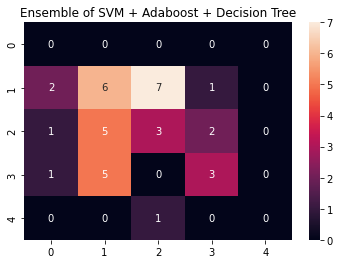

In [17]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import seaborn as sns
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier 

seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
# create the sub models
estimatorsh = []
estimatorss = []
model1 = DecisionTreeClassifier()
model2 = SVC(kernel= 'linear', C=1)
model3 = AdaBoostClassifier(n_estimators=300)

estimatorsh.append(('svm', model2))
estimatorsh.append(('dt', model1))
estimatorsh.append(('abc', model3))


model1 = DecisionTreeClassifier()
model2 = SVC(kernel= 'linear', C=1, probability=True)
model3 = AdaBoostClassifier(n_estimators=300)

estimatorss.append(('svm', model2))
estimatorss.append(('dt', model1))
estimatorss.append(('abc', model3))


# create the ensemble model
cl_switz = VotingClassifier(estimatorss, voting ='soft')

cl_switz.fit(x_train, y_train)
y_pred = cl_switz.predict(x_test)
accuracy_score(y_test, y_pred)


cm = confusion_matrix(y_test, y_pred)
pyplot.title("Ensemble of SVM + Adaboost + Decision Tree")
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_pred))

## Switzerland domain Model

In [18]:
import pickle
# now you can save it to a file
with open('models/switzerland_ensemble.pkl', 'wb') as f:
     pickle.dump(cl_switz, f)

/mnt/c/Users/meivenkatkumar/fyp/fyp1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


(294, 3)
(294, 12)
x_train (205, 11)
x_test (89, 11)
y_train (205,)
y_test (89,)


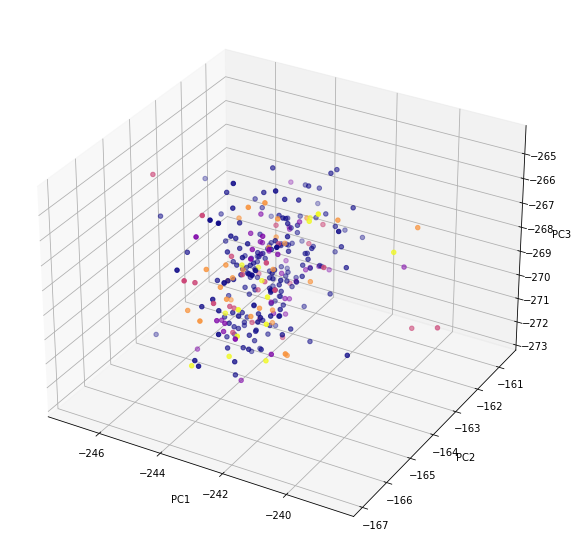

In [19]:
data = pd.read_csv("./data/hungarian_01.csv")

y_hungary = data['num']

X_list  = []
PCA_list = []
for key in importantFeatures:
    if key in data: 
         X_list.append(key)
        
x_important = pd.DataFrame(data.loc[:, X_list], columns=X_list)


for key in data.columns:
    if key not in X_list:
        PCA_list.append(key)

pcaCandidates = pd.DataFrame(data.loc[:, PCA_list], columns=PCA_list)


scaling=StandardScaler()
scaling.fit(pcaCandidates)
Scaled_data=scaling.transform(pcaCandidates)

principal=PCA(n_components=3)
principal.fit(pcaCandidates)
postPCA=principal.transform(Scaled_data)

print(postPCA.shape)

fig = pyplot.figure(figsize=(10,10))
 
# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')
 
# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(postPCA[:,0], postPCA[:,1], postPCA[:,2], c=x_important['num'],cmap='plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)

postPCA = pd.DataFrame(postPCA, columns=['pca1', 'pca2', 'pca3'])
postPCA.describe()


data =  pd.concat([x_important, postPCA], axis=1)
print(data.shape)
data.describe()


y = data.num.values
x = data.drop(["num"],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

              precision    recall  f1-score   support

           0       0.73      0.80      0.76        59
           1       0.10      0.07      0.08        14
           2       0.33      0.12      0.18         8
           3       0.11      0.17      0.13         6
           4       0.00      0.00      0.00         2

    accuracy                           0.56        89
   macro avg       0.26      0.23      0.23        89
weighted avg       0.54      0.56      0.55        89



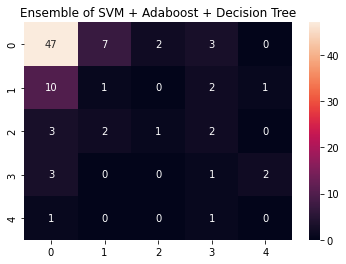

In [23]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import seaborn as sns
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier 

seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
# create the sub models
estimatorsh = []
estimatorss = []
model1 = DecisionTreeClassifier()
model2 = SVC(kernel= 'linear', C=1)
model3 = AdaBoostClassifier(n_estimators=300)

estimatorsh.append(('svm', model2))
estimatorsh.append(('dt', model1))
estimatorsh.append(('abc', model3))


model1 = DecisionTreeClassifier()
model2 = SVC(kernel= 'linear', C=1, probability=True)
model3 = AdaBoostClassifier(n_estimators=300)

estimatorss.append(('svm', model2))
estimatorss.append(('dt', model1))
estimatorss.append(('abc', model3))


# create the ensemble model
cl_hungary = VotingClassifier(estimatorss, voting ='soft')

cl_hungary.fit(x_train, y_train)
y_pred = cl_hungary.predict(x_test)
accuracy_score(y_test, y_pred)


cm = confusion_matrix(y_test, y_pred)
pyplot.title("Ensemble of SVM + Adaboost + Decision Tree")
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_pred))

In [24]:
import pickle
# now you can save it to a file
with open('models/hungary_ensemble.pkl', 'wb') as f:
     pickle.dump(cl_hungary, f)

## Hungary domain Model

(200, 3)
(200, 12)
x_train (140, 11)
x_test (60, 11)
y_train (140,)
y_test (60,)


/mnt/c/Users/meivenkatkumar/fyp/fyp1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


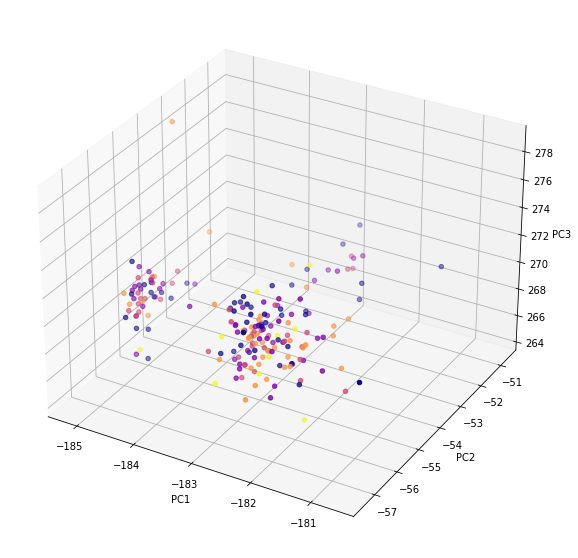

In [25]:
data = pd.read_csv("./data/longbeach_01.csv")

y_longbeach = data['num']


X_list  = []
PCA_list = []
for key in importantFeatures:
    if key in data: 
         X_list.append(key)
        
x_important = pd.DataFrame(data.loc[:, X_list], columns=X_list)


for key in data.columns:
    if key not in X_list:
        PCA_list.append(key)

pcaCandidates = pd.DataFrame(data.loc[:, PCA_list], columns=PCA_list)


scaling=StandardScaler()
scaling.fit(pcaCandidates)
Scaled_data=scaling.transform(pcaCandidates)

principal=PCA(n_components=3)
principal.fit(pcaCandidates)
postPCA=principal.transform(Scaled_data)

print(postPCA.shape)

fig = pyplot.figure(figsize=(10,10))
 
# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')
 
# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(postPCA[:,0], postPCA[:,1], postPCA[:,2], c=x_important['num'],cmap='plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)

postPCA = pd.DataFrame(postPCA, columns=['pca1', 'pca2', 'pca3'])
postPCA.describe()


data =  pd.concat([x_important, postPCA], axis=1)
print(data.shape)
data.describe()


y = data.num.values
x = data.drop(["num"],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

              precision    recall  f1-score   support

           0       0.16      0.25      0.19        12
           1       0.46      0.30      0.36        20
           2       0.38      0.42      0.40        12
           3       0.14      0.17      0.15        12
           4       1.00      0.25      0.40         4

    accuracy                           0.28        60
   macro avg       0.43      0.28      0.30        60
weighted avg       0.36      0.28      0.30        60



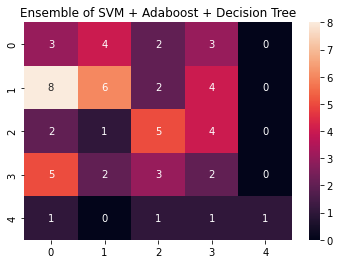

In [26]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import seaborn as sns
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier 

seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
# create the sub models
estimatorsh = []
estimatorss = []
model1 = DecisionTreeClassifier()
model2 = SVC(kernel= 'linear', C=1)
model3 = AdaBoostClassifier(n_estimators=300)

estimatorsh.append(('svm', model2))
estimatorsh.append(('dt', model1))
estimatorsh.append(('abc', model3))


model1 = DecisionTreeClassifier()
model2 = SVC(kernel= 'linear', C=1, probability=True)
model3 = AdaBoostClassifier(n_estimators=300)

estimatorss.append(('svm', model2))
estimatorss.append(('dt', model1))
estimatorss.append(('abc', model3))


# create the ensemble model
cl_lb = VotingClassifier(estimatorss, voting ='soft')

cl_lb.fit(x_train, y_train)
y_pred = cl_lb.predict(x_test)
accuracy_score(y_test, y_pred)


cm = confusion_matrix(y_test, y_pred)
pyplot.title("Ensemble of SVM + Adaboost + Decision Tree")
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_pred))

In [27]:
import pickle
# now you can save it to a file
with open('models/longbeach_ensemble.pkl', 'wb') as f:
     pickle.dump(cl_lb, f)

## Longbeach Domain Model

In [17]:
import pickle
import pandas as pd 
import matplotlib.pyplot as pyplot
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

with open('models/cleveland_ensemble.pkl', 'rb') as f:
    cleveland_clf = pickle.load(f)

with open('models/hungary_ensemble.pkl', 'rb') as f:
    hungary_clf = pickle.load(f)
    
with open('models/switzerland_ensemble.pkl', 'rb') as f:
    switz_clf = pickle.load(f)

with open('models/longbeach_ensemble.pkl', 'rb') as f:
    longbeach_clf = pickle.load(f)

In [7]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
import plotly.graph_objects as go
import datapane as dp
%matplotlib inline


# Domain Adaptation using Partial learning, similar to transfer learning

(282, 17)
(282, 3)


/mnt/c/Users/meivenkatkumar/fyp/fyp1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


,pca1,pca2,pca3
count,282.000000,282.000000,282.000000
mean,-282.769745,-260.058066,94.639238
std,1.064947,1.623220,1.163242
min,-285.142415,-264.031279,92.290595
25%,-283.510350,-261.056008,93.789752
50%,-282.828437,-260.130861,94.600458
75%,-282.133080,-259.111008,95.401672
max,-276.762445,-255.378829,97.846397


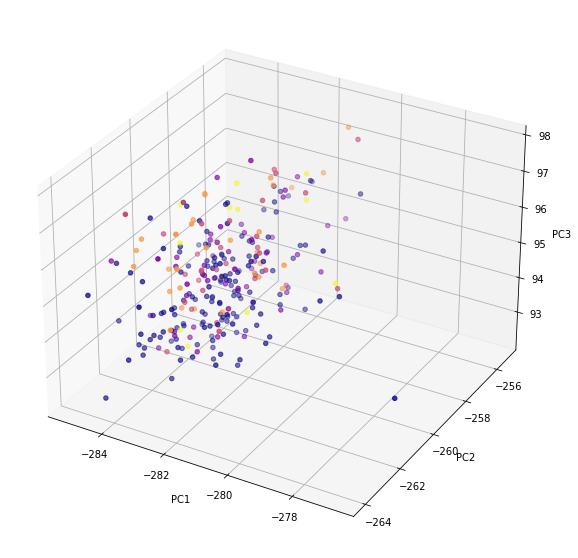

In [33]:
data = pd.read_csv("./data/cleveland_final.csv")
imp_features = data.iloc[:, imp_featuresInd]


#References for the keys for other domains
importantFeatures = data.columns[imp_featuresInd]


print(imp_features.shape)
imp_features.describe()


pcaCandidates = data.drop(imp_features.columns, axis=1)
pcaCandidates.describe()

scaling=StandardScaler()
 
scaling.fit(pcaCandidates)
Scaled_data=scaling.transform(pcaCandidates)
 

principal=PCA(n_components=3)
principal.fit(pcaCandidates)
# principal.fit(Scaled_data)
postPCA=principal.transform(Scaled_data)

print(postPCA.shape)

fig = pyplot.figure(figsize=(10,10))
 
# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')
 
# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(postPCA[:,0], postPCA[:,1], postPCA[:,2], c=imp_features['num'],cmap='plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)

postPCA = pd.DataFrame(postPCA, columns=['pca1', 'pca2', 'pca3'])
postPCA.describe()



(282, 20)
x_train (197, 19)
x_test (85, 19)
y_train (197,)
y_test (85,)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       0.76      1.00      0.87        13
           2       0.64      1.00      0.78         7
           3       1.00      0.46      0.63        13
           4       1.00      0.80      0.89         5

    accuracy                           0.91        85
   macro avg       0.88      0.85      0.83        85
weighted avg       0.93      0.91      0.90        85



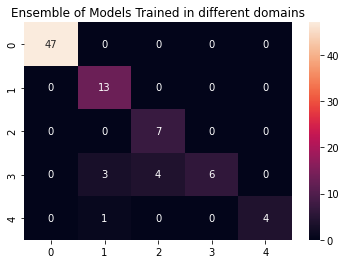

In [34]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

data =  pd.concat([imp_features, postPCA], axis=1)
print(data.shape)
data.describe()

y = data['num']
x = data.drop(["num"],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)


from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import seaborn as sns
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB

seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)

estimatorss = []
model1 = cleveland_clf
model2 = hungary_clf
model3 = switz_clf
model4 = longbeach_clf

estimatorss.append(('cleveland', model1))
estimatorss.append(('hungary', model2))
estimatorss.append(('switzerland', model3))
estimatorss.append(('longbeach', model4))


# # create the ensemble model
# multiDomain = MultinomialNB(estimatorss)

# multiDomain.partial_fit(x_train, y_train)
# y_pred = cl_switz.predict(x_test)
# accuracy_score(y_test, y_pred)

import numpy as np
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import copy
    
eclf2 = EnsembleVoteClassifier(clfs=[model1, model2, model3, model4], voting="soft")
eclf2.fit(x_train, y_train)
y_pred = eclf2.predict(x_test)


cm = confusion_matrix(y_test, y_pred)
pyplot.title("Ensemble of Models Trained in different domains")
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_pred))

## Cleveland after Domain Adaptation @ 91% accuracy

(123, 3)
(123, 12)
x_train (86, 11)
x_test (37, 11)
y_train (86,)
y_test (37,)


/mnt/c/Users/meivenkatkumar/fyp/fyp1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


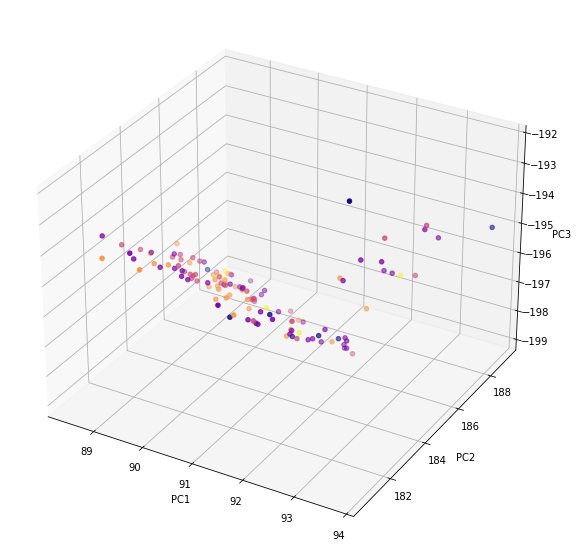

In [42]:
data = pd.read_csv("./data/switzerland_01.csv")

y_switz = data['num']

X_list  = []
PCA_list = []
for key in importantFeatures:
    if key in data: 
         X_list.append(key)
        
x_important = pd.DataFrame(data.loc[:, X_list], columns=X_list)

for key in data.columns:
    if key not in X_list:
        PCA_list.append(key)

        
pcaCandidates = pd.DataFrame(data.loc[:, PCA_list], columns=PCA_list)


scaling=StandardScaler()
scaling.fit(pcaCandidates)
Scaled_data=scaling.transform(pcaCandidates)

principal=PCA(n_components=3)
principal.fit(pcaCandidates)
postPCA=principal.transform(Scaled_data)

print(postPCA.shape)

fig = pyplot.figure(figsize=(10,10))
 
# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')
 
# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(postPCA[:,0], postPCA[:,1], postPCA[:,2], c=x_important['num'],cmap='plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)

postPCA = pd.DataFrame(postPCA, columns=['pca1', 'pca2', 'pca3'])
postPCA.describe()


data =  pd.concat([x_important, postPCA], axis=1)
print(data.shape)
data.describe()


y = data.num.values
x = data.drop(["num"],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.50      0.44      0.47        16
           2       0.33      0.36      0.35        11
           3       0.43      0.33      0.38         9
           4       0.00      0.00      0.00         1

    accuracy                           0.38        37
   macro avg       0.25      0.23      0.24        37
weighted avg       0.42      0.38      0.40        37



/mnt/c/Users/meivenkatkumar/fyp/fyp1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/mnt/c/Users/meivenkatkumar/fyp/fyp1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/mnt/c/Users/meivenkatkumar/fyp/fyp1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result

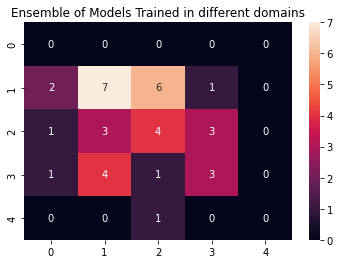

In [47]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import seaborn as sns
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB

seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)

estimatorss = []
model1 = cleveland_clf
model2 = hungary_clf
model3 = switz_clf
model4 = longbeach_clf

estimatorss.append(('cleveland', model1))
estimatorss.append(('hungary', model2))
estimatorss.append(('switzerland', model3))
estimatorss.append(('longbeach', model4))


# # create the ensemble model
# multiDomain = MultinomialNB(estimatorss)

# multiDomain.partial_fit(x_train, y_train)
# y_pred = cl_switz.predict(x_test)
# accuracy_score(y_test, y_pred)

import numpy as np
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import copy
    
eclf2 = EnsembleVoteClassifier(clfs=[model1, model2, model3, model4], voting="soft")
eclf2.fit(x_train, y_train)
y_pred = eclf2.predict(x_test)


cm = confusion_matrix(y_test, y_pred)
pyplot.title("Ensemble of Models Trained in different domains")
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_pred))

## Switzerland after Domain Adaptation @ 38% accuracy

(294, 3)
(294, 12)
x_train (205, 11)
x_test (89, 11)
y_train (205,)
y_test (89,)


/mnt/c/Users/meivenkatkumar/fyp/fyp1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


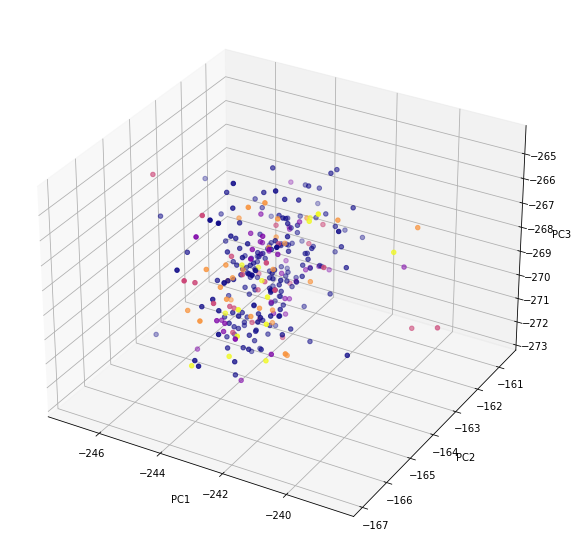

In [49]:
data = pd.read_csv("./data/hungarian_01.csv")

y_switz = data['num']

X_list  = []
PCA_list = []
for key in importantFeatures:
    if key in data: 
         X_list.append(key)
        
x_important = pd.DataFrame(data.loc[:, X_list], columns=X_list)

for key in data.columns:
    if key not in X_list:
        PCA_list.append(key)

        
pcaCandidates = pd.DataFrame(data.loc[:, PCA_list], columns=PCA_list)


scaling=StandardScaler()
scaling.fit(pcaCandidates)
Scaled_data=scaling.transform(pcaCandidates)

principal=PCA(n_components=3)
principal.fit(pcaCandidates)
postPCA=principal.transform(Scaled_data)

print(postPCA.shape)

fig = pyplot.figure(figsize=(10,10))
 
# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')
 
# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(postPCA[:,0], postPCA[:,1], postPCA[:,2], c=x_important['num'],cmap='plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)

postPCA = pd.DataFrame(postPCA, columns=['pca1', 'pca2', 'pca3'])
postPCA.describe()


data =  pd.concat([x_important, postPCA], axis=1)
print(data.shape)
data.describe()


y = data.num.values
x = data.drop(["num"],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

              precision    recall  f1-score   support

           0       0.74      0.92      0.82        59
           1       0.20      0.07      0.11        14
           2       0.00      0.00      0.00         8
           3       0.12      0.17      0.14         6
           4       0.00      0.00      0.00         2

    accuracy                           0.63        89
   macro avg       0.21      0.23      0.21        89
weighted avg       0.53      0.63      0.57        89



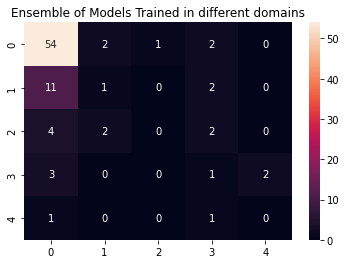

In [55]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import seaborn as sns
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB

seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)

estimatorss = []
model1 = cleveland_clf
model2 = hungary_clf
model3 = switz_clf
model4 = longbeach_clf

estimatorss.append(('cleveland', model1))
estimatorss.append(('hungary', model2))
estimatorss.append(('switzerland', model3))
estimatorss.append(('longbeach', model4))


# # create the ensemble model
# multiDomain = MultinomialNB(estimatorss)

# multiDomain.partial_fit(x_train, y_train)
# y_pred = cl_switz.predict(x_test)
# accuracy_score(y_test, y_pred)

import numpy as np
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import copy
    
eclf2 = EnsembleVoteClassifier(clfs=[model1, model2, model3, model4], voting="soft")
eclf2.fit(x_train, y_train)
y_pred = eclf2.predict(x_test)


cm = confusion_matrix(y_test, y_pred)
pyplot.title("Ensemble of Models Trained in different domains")
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_pred))

## Hungary after Domain Adaptation @ 63% accuracy

(200, 3)
(200, 12)
x_train (140, 11)
x_test (60, 11)
y_train (140,)
y_test (60,)


/mnt/c/Users/meivenkatkumar/fyp/fyp1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


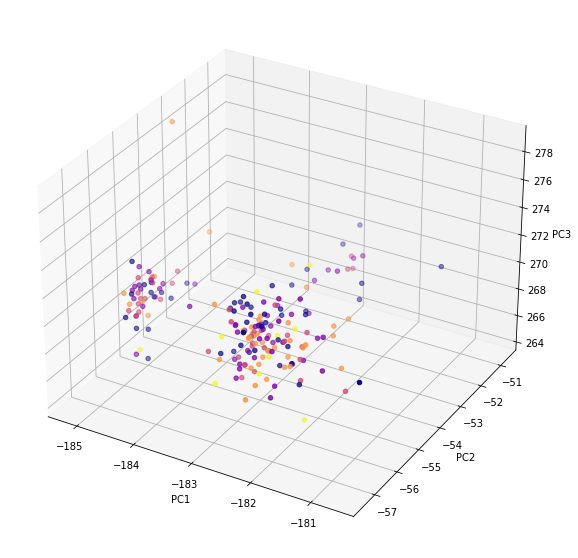

In [8]:
data = pd.read_csv("./data/longbeach_01.csv")

y_switz = data['num']

X_list  = []
PCA_list = []
for key in importantFeatures:
    if key in data: 
         X_list.append(key)
        
x_important = pd.DataFrame(data.loc[:, X_list], columns=X_list)

for key in data.columns:
    if key not in X_list:
        PCA_list.append(key)

        
pcaCandidates = pd.DataFrame(data.loc[:, PCA_list], columns=PCA_list)


scaling=StandardScaler()
scaling.fit(pcaCandidates)
Scaled_data=scaling.transform(pcaCandidates)

principal=PCA(n_components=3)
principal.fit(pcaCandidates)
postPCA=principal.transform(Scaled_data)

print(postPCA.shape)

fig = pyplot.figure(figsize=(10,10))
 
# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')
 
# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(postPCA[:,0], postPCA[:,1], postPCA[:,2], c=x_important['num'],cmap='plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)

postPCA = pd.DataFrame(postPCA, columns=['pca1', 'pca2', 'pca3'])
postPCA.describe()


data =  pd.concat([x_important, postPCA], axis=1)
print(data.shape)
data.describe()


y = data.num.values
x = data.drop(["num"],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

              precision    recall  f1-score   support

           0       0.19      0.33      0.24        12
           1       0.31      0.20      0.24        20
           2       0.30      0.25      0.27        12
           3       0.13      0.17      0.15        12
           4       0.00      0.00      0.00         4

    accuracy                           0.22        60
   macro avg       0.19      0.19      0.18        60
weighted avg       0.23      0.22      0.21        60



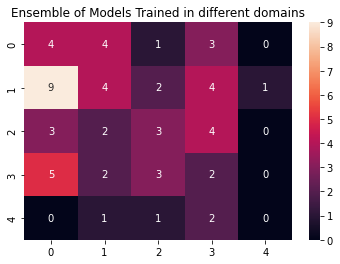

In [19]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import seaborn as sns
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB

seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
import pickle
import pandas as pd 
import matplotlib.pyplot as pyplot
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

with open('models/cleveland_ensemble.pkl', 'rb') as f:
    cleveland_clf = pickle.load(f)

with open('models/hungary_ensemble.pkl', 'rb') as f:
    hungary_clf = pickle.load(f)
    
with open('models/switzerland_ensemble.pkl', 'rb') as f:
    switz_clf = pickle.load(f)

with open('models/longbeach_ensemble.pkl', 'rb') as f:
    longbeach_clf = pickle.load(f)
    
estimatorss = []
model1 = cleveland_clf
model2 = hungary_clf
model3 = switz_clf
model4 = longbeach_clf

estimatorss.append(('cleveland', model1))
estimatorss.append(('hungary', model2))
estimatorss.append(('switzerland', model3))
estimatorss.append(('longbeach', model4))


# # create the ensemble model
# multiDomain = MultinomialNB(estimatorss)

# multiDomain.partial_fit(x_train, y_train)
# y_pred = cl_switz.predict(x_test)
# accuracy_score(y_test, y_pred)

import numpy as np
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import copy
    
eclf2 = EnsembleVoteClassifier(clfs=[model4, model3, model2, model1], voting="soft")
eclf2.fit(x_train, y_train)
y_pred = eclf2.predict(x_test)


cm = confusion_matrix(y_test, y_pred)
pyplot.title("Ensemble of Models Trained in different domains")
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_pred))